In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
import warnings
warnings.filterwarnings('ignore')
import graphviz
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#載入數據
bank_analysis=pd.read_csv('bank-additional.csv',sep=';',error_bad_lines=False)
bank_analysis.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
AI_bank=bank_analysis

In [4]:
#查看是否有缺失值
AI_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
le=LabelEncoder()
#把資料轉成二進制
def Labelencoder(df1,df):
    df1[df]=le.fit_transform(df1[df])
    return df1

In [6]:
AI_bank=Labelencoder(AI_bank,'job')
AI_bank=Labelencoder(AI_bank,'marital')
AI_bank=Labelencoder(AI_bank,'education')
AI_bank=Labelencoder(AI_bank,'default')
AI_bank=Labelencoder(AI_bank,'housing')
AI_bank=Labelencoder(AI_bank,'loan')
AI_bank=Labelencoder(AI_bank,'contact')
AI_bank=Labelencoder(AI_bank,'month')
AI_bank=Labelencoder(AI_bank,'day_of_week')
AI_bank=Labelencoder(AI_bank,'poutcome')
AI_bank=Labelencoder(AI_bank,'y')

In [7]:
#正規化
saler=StandardScaler()

def allsaler(df1,df):
    df1[df]=saler.fit_transform(df1[df])
    return df1

In [8]:
AI_bank=Labelencoder(AI_bank,'age')
AI_bank=Labelencoder(AI_bank,'duration')
AI_bank=Labelencoder(AI_bank,'campaign')
AI_bank=Labelencoder(AI_bank,'pdays')
AI_bank=Labelencoder(AI_bank,'emp.var.rate')
AI_bank=Labelencoder(AI_bank,'cons.price.idx')
AI_bank=Labelencoder(AI_bank,'cons.conf.idx')
AI_bank=Labelencoder(AI_bank,'nr.employed')

>數據拆分

In [9]:
#營銷結果預測
df_poutcome=AI_bank.drop(['poutcome'],axis=1)
y_df_poutcome=AI_bank['poutcome']

In [10]:
#訂閱結果預測
df_y=AI_bank.drop(['y'],axis=1)
y_df_y=AI_bank['y']

In [11]:
df_poutcome_train,df_poutcome_test,y_df_poutcome_train,y_df_poutcome_test=train_test_split(
    df_poutcome,
    y_df_poutcome,
    test_size=0.3,
    random_state=42
)

In [12]:
df_y_train,df_y_test,y_df_y_train,y_df_y_test=train_test_split(
    df_y,
    y_df_y,
    test_size=0.3,
    random_state=42
)

>建模

In [13]:
models=[
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    KNeighborsClassifier()
]

def scores(model,X,y):
    kfold=KFold(n_splits=5,random_state=0)
    predicts=cross_val_score(model,X,y,cv=kfold)
    print(predicts.mean())

>預測營銷結果建模

In [14]:
#使用交叉驗證選出最好的模型
for model in models:
    scores(model,df_poutcome_train,y_df_poutcome_train)

0.9930633785865588
0.995840554592721
0.9961859715000962
0.9958393510494897
0.9889021278644329
0.844951737916426


>驗證結果為ExtraTreesClassifier模型最出色

In [15]:
ram=ExtraTreesClassifier()
ram.fit(df_poutcome_train,y_df_poutcome_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [16]:
y_poutcome=ram.predict(df_poutcome_test)
print(y_poutcome)
print(confusion_matrix(y_df_poutcome_test,y_poutcome))
print(classification_report(y_df_poutcome_test,y_poutcome))

[1 1 0 ... 1 1 1]
[[ 125    1    4]
 [   0 1074    0]
 [   1    0   31]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       130
           1       1.00      1.00      1.00      1074
           2       0.89      0.97      0.93        32

    accuracy                           1.00      1236
   macro avg       0.96      0.98      0.97      1236
weighted avg       1.00      1.00      1.00      1236



previous          0.517833
pdays             0.149730
euribor3m         0.073120
emp.var.rate      0.047604
nr.employed       0.035878
contact           0.021395
cons.price.idx    0.020731
dtype: float64


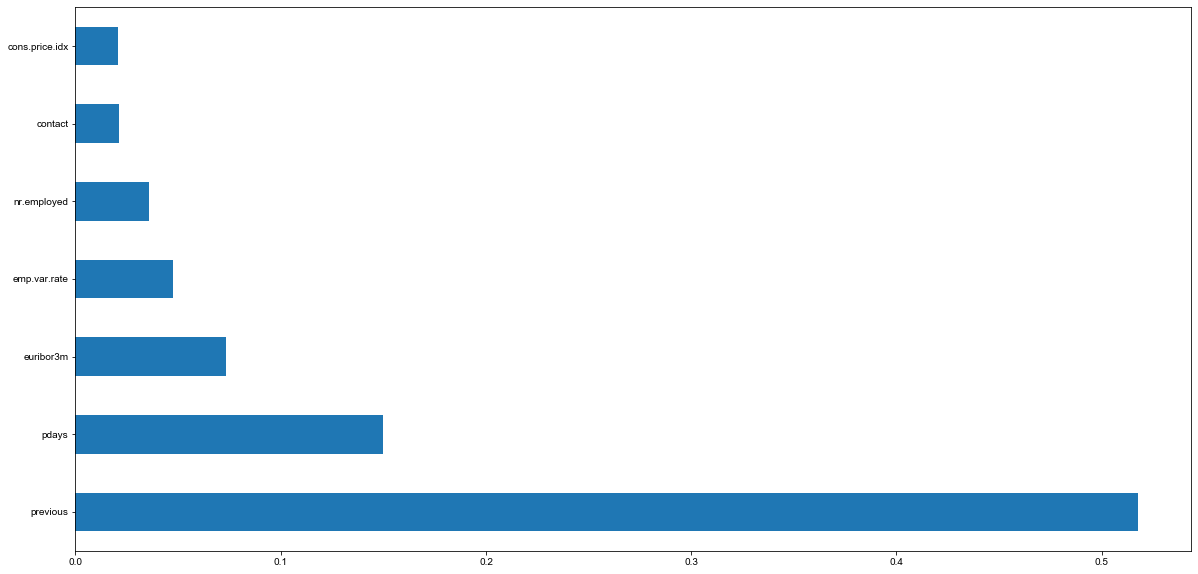

In [17]:
#畫出關聯圖
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
imp=pd.Series(ram.feature_importances_,index=df_poutcome.columns)
imp.nlargest(7).plot(kind='barh')
print(imp.nlargest(7))

>對訂閱結果進行預測建模

In [18]:
for model in models:
    scores(model,df_y_train,y_df_y_train)

0.8897018823416136
0.91467480261891
0.9091240612362796
0.9174495715386097
0.9125938763720391
0.8952490130945503


>是GradientBoostingClassifier模型最出色

In [19]:
rams=GradientBoostingClassifier()
rams.fit(df_y_train,y_df_y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
y_y=rams.predict(df_y_test)
print(y_y)
print(confusion_matrix(y_df_y_test,y_y))
print(classification_report(y_df_y_test,y_y))

[1 0 0 ... 0 0 0]
[[1049   56]
 [  64   67]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.54      0.51      0.53       131

    accuracy                           0.90      1236
   macro avg       0.74      0.73      0.74      1236
weighted avg       0.90      0.90      0.90      1236



duration         0.449106
nr.employed      0.209818
euribor3m        0.101030
age              0.038950
poutcome         0.038185
pdays            0.032541
cons.conf.idx    0.031581
dtype: float64


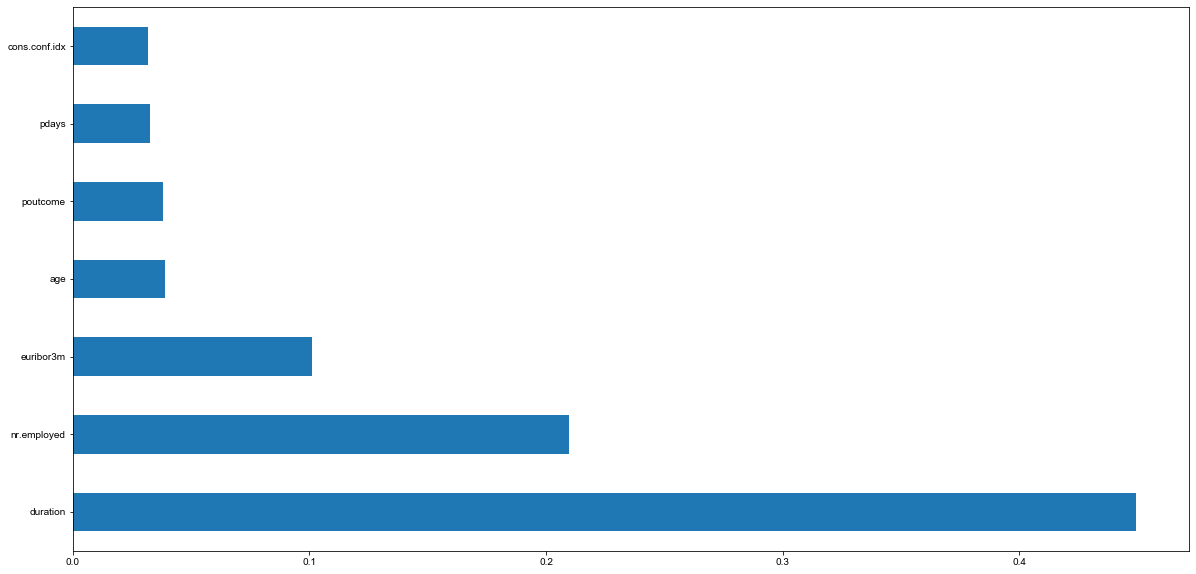

In [21]:
#畫出關聯圖
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
imp2=pd.Series(rams.feature_importances_,index=df_y.columns)
imp2.nlargest(7).plot(kind='barh')
print(imp2.nlargest(7))

In [30]:
AI_bank.corr()['y']

age               0.059704
job               0.026725
marital           0.043833
education         0.067316
default          -0.076627
housing           0.000957
loan             -0.012709
contact          -0.137401
month             0.005049
day_of_week      -0.006370
duration          0.419717
campaign         -0.077265
pdays            -0.329223
previous          0.255697
poutcome          0.123395
emp.var.rate     -0.271402
cons.price.idx   -0.102792
cons.conf.idx     0.069683
euribor3m        -0.298565
nr.employed      -0.351660
y                 1.000000
Name: y, dtype: float64

default

loan

contact

day_of_week 

campaign

pdays

emp.var.rate

cons.price.idx

euribor3m

nr.employed

In [32]:
df_corr=AI_bank.drop([
    'default',
    'loan',
    'contact',
    'day_of_week',
    'campaign',
    'pdays',
    'emp.var.rate',
    'cons.price.idx',
    'euribor3m',
    'nr.employed'
],axis=1)

In [52]:
df_corr

,age,job,marital,education,housing,month,duration,previous,poutcome,cons.conf.idx,y
0,12,1,1,2,2,6,474,0,1,4,0
1,21,7,2,3,0,6,343,0,1,16,0
2,7,7,1,3,2,4,224,0,1,8,0
3,20,7,1,2,1,4,14,0,1,8,0
4,29,0,1,6,2,7,55,0,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,2,3,50,0,1,6,0
4115,21,0,1,3,2,3,216,0,1,6,0
4116,9,8,2,3,0,6,61,1,0,4,0
4117,40,0,1,3,0,1,510,0,1,17,0


In [34]:
X=df_corr.drop(['y'],axis=1)
y=df_corr['y']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [40]:
for model in models:
    scores(model,X_train,y_train)

0.8872701232428268
0.9101591084151742
0.901837208742538
0.9132853119584056
0.8969875312921239
0.8949023926439438


In [49]:
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
y_pred=gr.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
print(y_pred)
print(classification_report(y_test,y_pred))

[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1105
           1       0.57      0.42      0.48       131

    accuracy                           0.90      1236
   macro avg       0.75      0.69      0.71      1236
weighted avg       0.89      0.90      0.90      1236



In [53]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
minscaler=MinMaxScaler()
X=minscaler.fit_transform(X)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [60]:
for model in models:
    scores(model,X_train,y_train)

0.8851916040824186
0.9073885518967841
0.9011463749277873
0.9153668399768922
0.9056536443289044
0.8945557721933373


In [61]:
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
y_pred=gr.predict(X_test)
print(y_pred)
print(classification_report(y_test,y_pred))

[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1105
           1       0.56      0.41      0.48       131

    accuracy                           0.90      1236
   macro avg       0.75      0.69      0.71      1236
weighted avg       0.89      0.90      0.90      1236

